## a

### Inicializacion

In [211]:
import pandas as pd

dataset_raw=pd.read_csv("winequality_BDS.csv",sep=';')

dataset_raw.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  Moscatel            8.1              0.24         0.32            10.5   
1  Moscatel            5.8              0.23         0.20             2.0   
2  Moscatel            7.5              0.33         0.36             2.6   
3  Moscatel            6.6              0.38         0.36             9.2   
4  Moscatel            6.4              0.15         0.29             1.8   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.030                 34.0                 105.0  0.99407  3.11   
1      0.043                 39.0                 154.0  0.99226  3.21   
2      0.051                 26.0                 126.0  0.99097  3.32   
3      0.061                 42.0                 214.0  0.99760  3.31   
4      0.044                 21.0                 115.0  0.99166  3.10   

   sulphates alcohol  quality  
0       0.42    11.8        6  
1       0.39    10.2        6  
2       0.53    12.7        6  
3       0.56     9.4        5  
4       0.38    10.2        5

In [212]:
dataset_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3231 entries, 0 to 3230
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  3231 non-null   object 
 1   fixed acidity         3231 non-null   float64
 2   volatile acidity      3231 non-null   float64
 3   citric acid           3231 non-null   float64
 4   residual sugar        3231 non-null   float64
 5   chlorides             3231 non-null   float64
 6   free sulfur dioxide   3231 non-null   float64
 7   total sulfur dioxide  3231 non-null   float64
 8   density               3231 non-null   float64
 9   pH                    3231 non-null   float64
 10  sulphates             3231 non-null   float64
 11  alcohol               3231 non-null   object 
 12  quality               3231 non-null   int64  
dtypes: float64(10), int64(1), object(2)
memory usage: 328.3+ KB


1.	type: tipo de uva con la que se elabora el vino.
2.	fixed acidity: cantidad de ácidos no volátiles presentes en el vino, medida en gramos por litro.
3.	volatile acidity: cantidad de ácidos volátiles presentes en el vino, medida en gramos por litro. 
4.	citric acid: contenido de ácido cítrico en el vino, medido en gramos por litro.
5.	residual sugar: cantidad de azúcar que queda en el vino después de la fermentación, medida en gramos por litro. 
6.	chlorides: concentración de cloruros (sales) en el vino, medida en gramos por litro.
7.	free sulfur dioxide: cantidad de dióxido de azufre que no está ligado químicamente en el vino, medida en miligramos por litro. 
8.	total sulfur dioxide: suma del dióxido de azufre libre y el combinado en el vino, medida en miligramos por litro.
9.	density: medida de la masa por unidad de volumen del vino, utilizada para estimar la concentración de sólidos disueltos, medida en gramos por centímetro cúbico.
10.	pH: medida de la acidez o alcalinidad del vino. 
11.	sulphates: concentración de sales de sulfato en el vino, medida en gramos por litro. 
12.	alcohol: contenido alcohólico del vino, medido en porcentaje de volumen (% vol).
13.	quality: puntuación del vino, con una escala que va de 0 a 10.


In [213]:
dataset_raw["type"].value_counts()

type
Moscatel    1632
Syrah       1599
Name: count, dtype: int64

### Analizamos los valores de cada columna y evaluamos en base al INV Argentina su validez (Analisis univariado).

Más adelente tomaremos decisiones sobre los valores de cada columna.

Analizamos la columna alcohol, ya que aparece como object, cuando en el head() vimos que había float:

In [214]:
for idx, val in dataset_raw["alcohol"].value_counts().sort_index().items():
    print(idx,val)

10 98
10.1 81
10.15 3
10.2 81
10.3 53
10.4 87
10.5 107
10.55 4
10.6 58
10.65 1
10.7 64
10.75 1
10.8 86
10.9 80
10.98 1
100.333.333.333.333 3
101.333.333.333.333 2
104.666.666.666.667 2
105.333.333.333.333 1
105.666.666.666.667 1
109.333.333.333.333 2
109.666.666.666.667 3
11 120
11.05 2
11.1 70
11.2 90
11.3 74
11.35 1
11.4 72
11.45 4
11.5 65
11.55 1
11.6 31
11.65 1
11.7 45
11.75 2
11.8 56
11.85 1
11.9 33
11.94 2
11.95 2
110.666.666.666.667 2
112.666.666.666.667 1
113.333.333.333.333 3
113.666.666.666.667 1
114.333.333.333.333 1
114.666.666.666.667 1
116.333.333.333.333 2
117.333.333.333.333 1
12 52
12.05 1
12.1 33
12.15 2
12.2 45
12.25 1
12.3 36
12.4 47
12.5 62
12.6 30
12.7 34
12.75 3
12.8 42
12.9 30
120.666.666.666.667 1
123.333.333.333.333 1
128.933.333.333.333 2
13 31
13.05 1
13.1 18
13.2 13
13.3 6
13.4 18
13.5 6
13.55 1
13.6 13
13.7 3
13.8 2
13.9 2
131.333.333.333.333 1
135.666.666.666.667 1
14 9
14.05 1
14.2 1
14.9 1
8.4 5
8.5 5
8.6 2
8.7 19
8.8 33
8.9 16
9 68
9.05 1
9.1 71
9.2 13

Vemos que hay valores que suponemos que son periodicos mal cargados.

Analizamos la columna fixed acidity.

In [215]:
for a,b in dataset_raw["fixed acidity"].value_counts().sort_index().items():
    print(a,b)

3.8 1
3.9 1
4.4 3
4.6 1
4.7 6
4.8 7
4.9 7
5.0 19
5.1 15
5.2 17
5.3 17
5.4 24
5.5 16
5.6 48
5.7 53
5.8 65
5.9 60
6.0 121
6.1 89
6.2 102
6.3 84
6.4 146
6.5 106
6.6 157
6.7 121
6.8 151
6.9 104
7.0 114
7.1 112
7.2 116
7.3 89
7.4 91
7.5 81
7.6 76
7.7 61
7.8 66
7.9 48
8.0 56
8.1 36
8.2 48
8.3 46
8.4 29
8.5 21
8.6 31
8.7 26
8.8 37
8.9 36
9.0 28
9.1 29
9.2 16
9.3 22
9.4 18
9.5 14
9.6 17
9.7 9
9.8 15
9.9 26
10.0 23
10.1 10
10.2 19
10.3 11
10.4 21
10.5 12
10.6 14
10.7 10
10.8 10
10.9 8
11.0 3
11.1 9
11.2 5
11.3 7
11.4 5
11.5 13
11.6 12
11.7 3
11.8 3
11.9 12
12.0 7
12.1 1
12.2 4
12.3 5
12.4 4
12.5 7
12.6 4
12.7 4
12.8 5
12.9 2
13.0 3
13.2 3
13.3 3
13.4 1
13.5 1
13.7 2
13.8 1
14.0 1
14.3 1
15.0 2
15.5 2
15.6 2
15.9 1


Siendo el valor minimo 3.8 y el máximo 15.9, no parece haber nulos o outliers.

Analizamos la columna volatile acidity.

In [216]:
dataset_raw["volatile acidity"].value_counts().sort_index()

volatile acidity
0.085     1
0.090     1
0.105     4
0.110     5
0.120    10
         ..
1.180     1
1.185     1
1.240     1
1.330     2
1.580     1
Name: count, Length: 172, dtype: int64

Siendo el minimo 0.085 y el máximo 1.58 no parece haber nulos ni outliers.

Analizamos la columna citric acid.

In [217]:
for a,b in dataset_raw["citric acid"].value_counts().sort_index().items():
    print(a,b)

0.0 140
0.01 37
0.02 53
0.03 30
0.04 32
0.05 21
0.06 26
0.07 22
0.08 33
0.09 37
0.1 40
0.11 16
0.12 36
0.13 22
0.14 28
0.15 29
0.16 24
0.17 29
0.18 45
0.19 45
0.2 64
0.21 62
0.22 74
0.23 71
0.24 117
0.25 92
0.26 130
0.27 125
0.28 156
0.29 115
0.3 146
0.31 86
0.32 126
0.33 88
0.34 78
0.35 59
0.36 59
0.37 52
0.38 42
0.39 46
0.4 56
0.41 40
0.42 38
0.43 18
0.44 35
0.45 36
0.46 29
0.47 30
0.48 38
0.49 81
0.5 35
0.51 21
0.52 28
0.53 21
0.54 19
0.55 12
0.56 12
0.57 15
0.58 10
0.59 9
0.6 11
0.61 5
0.62 5
0.63 10
0.64 9
0.65 7
0.66 16
0.67 4
0.68 11
0.69 6
0.7 2
0.71 4
0.72 2
0.73 4
0.74 5
0.75 1
0.76 3
0.78 2
0.79 2
0.82 1
0.86 1
0.91 2
1.0 2


Se encontró que la máxima medida legal de gramos por litro de ácidos cítricos es 1g/l. Todos los valores tienen sentido y no hay ninuno nulo.

Analizamos la columna residual sugar.

In [218]:
for a,b in dataset_raw["residual sugar"].value_counts().sort_index().items():
    print(a,b)

0.7 2
0.8 5
0.9 16
1.0 29
1.1 53
1.15 1
1.2 75
1.3 58
1.4 87
1.45 1
1.5 65
1.6 96
1.65 3
1.7 96
1.75 3
1.8 155
1.85 3
1.9 139
2.0 187
2.05 2
2.1 140
2.15 2
2.2 147
2.25 1
2.3 122
2.35 2
2.4 104
2.5 103
2.55 1
2.6 94
2.65 1
2.7 48
2.8 63
2.85 1
2.9 38
2.95 1
3.0 31
3.1 13
3.15 1
3.2 24
3.3 19
3.4 19
3.45 1
3.5 19
3.6 13
3.65 1
3.7 11
3.75 1
3.8 14
3.85 3
3.9 18
3.95 1
4.0 20
4.1 10
4.2 19
4.25 3
4.3 15
4.35 1
4.4 11
4.5 15
4.6 18
4.65 2
4.7 10
4.75 1
4.8 18
4.9 10
5.0 17
5.1 16
5.15 1
5.2 10
5.25 2
5.3 3
5.35 2
5.4 10
5.5 10
5.55 1
5.6 14
5.7 14
5.8 15
5.9 7
6.0 11
6.1 17
6.2 13
6.3 15
6.4 13
6.5 7
6.55 3
6.6 12
6.65 3
6.7 5
6.8 13
6.9 6
6.95 1
7.0 5
7.1 10
7.2 15
7.25 2
7.3 7
7.4 16
7.5 5
7.6 9
7.7 9
7.75 1
7.8 15
7.9 21
7.95 1
8.0 14
8.1 11
8.15 1
8.2 16
8.3 16
8.4 7
8.5 7
8.6 11
8.7 4
8.8 13
8.9 10
9.0 12
9.1 5
9.15 2
9.2 8
9.3 2
9.4 3
9.5 4
9.55 1
9.6 4
9.65 3
9.7 9
9.8 6
9.85 2
9.9 11
10.0 2
10.05 1
10.1 3
10.2 7
10.3 5
10.4 9
10.5 8
10.6 6
10.7 10
10.8 8
10.9 2
11.0 5
11.1 4
11.2 

Siendo el mínimo 0.7 y el máximo 26.05 no parece haber nulos o outliers. Son valores normales ya que en vinos secos no pasa de 4 g/l, en vinos semi-secos entre 4 g/l y 12 g/l, en vinos semi-dulces entre 12 g/l y 45 g/l y en vinos dulces más de 45 g/l.

Analizamos la columna chlorides.

In [219]:
for a,b in dataset_raw["chlorides"].value_counts().sort_index().items():
    print(a,b)

0.009 1
0.012 2
0.013 1
0.014 2
0.015 4
0.016 1
0.017 3
0.018 4
0.019 1
0.02 6
0.021 6
0.022 7
0.023 9
0.024 8
0.025 7
0.026 19
0.027 18
0.028 24
0.029 26
0.03 37
0.031 35
0.032 52
0.033 43
0.034 52
0.035 59
0.036 81
0.037 52
0.038 52
0.039 45
0.04 54
0.041 59
0.042 61
0.043 43
0.044 74
0.045 41
0.046 55
0.047 63
0.048 80
0.049 50
0.05 71
0.051 48
0.052 48
0.053 49
0.054 46
0.055 27
0.056 35
0.057 40
0.058 29
0.059 29
0.06 34
0.061 16
0.062 32
0.063 26
0.064 26
0.065 24
0.066 37
0.067 27
0.068 34
0.069 28
0.07 37
0.071 48
0.072 24
0.073 35
0.074 56
0.075 46
0.076 55
0.077 47
0.078 51
0.079 43
0.08 66
0.081 40
0.082 46
0.083 35
0.084 50
0.085 27
0.086 34
0.087 27
0.088 33
0.089 25
0.09 22
0.091 19
0.092 22
0.093 21
0.094 22
0.095 24
0.096 21
0.097 19
0.098 15
0.099 8
0.1 13
0.101 5
0.102 10
0.103 7
0.104 16
0.105 7
0.106 8
0.107 9
0.108 2
0.109 3
0.11 10
0.111 7
0.112 6
0.113 1
0.114 11
0.115 5
0.116 2
0.117 7
0.118 9
0.119 3
0.12 4
0.121 2
0.122 7
0.123 6
0.124 3
0.125 1
0.126 1
0.127 

Siendo el mínimo 0.009 y el máximo 0.611 no parece haber nulos o outliers.

Analizamos la columna free sulfur dioxide.

In [220]:
for a,b in dataset_raw["free sulfur dioxide"].value_counts().sort_index().items():
    print(a,b)

1.0 3
2.0 2
3.0 51
4.0 43
5.0 110
5.5 1
6.0 150
7.0 79
8.0 63
9.0 67
10.0 94
11.0 71
12.0 90
13.0 76
14.0 67
15.0 98
16.0 85
17.0 92
18.0 78
19.0 69
20.0 70
21.0 79
22.0 56
23.0 72
23.5 1
24.0 75
25.0 70
26.0 81
27.0 63
28.0 60
28.5 1
29.0 79
30.0 52
31.0 69
32.0 62
33.0 54
34.0 60
35.0 55
36.0 59
37.0 35
37.5 2
38.0 36
39.0 31
40.0 39
40.5 1
41.0 43
42.0 35
43.0 23
43.5 1
44.0 23
45.0 45
46.0 18
47.0 33
48.0 22
49.0 22
50.0 21
51.0 22
51.5 1
52.0 29
52.5 2
53.0 20
54.0 22
55.0 19
56.0 11
57.0 9
58.0 7
59.0 13
59.5 2
60.0 13
60.5 2
61.0 19
61.5 1
62.0 8
63.0 11
64.0 3
65.0 7
66.0 7
67.0 4
68.0 17
69.0 10
70.0 2
70.5 1
71.0 1
72.0 2
73.0 2
74.0 1
75.0 2
79.0 1
79.5 4
81.0 3
87.0 2
97.0 1
98.0 3
101.0 2
105.0 2
108.0 3
112.0 1
124.0 1
289.0 1


Siendo el mínimo 1 y el máximo 289, se llegó a la conclusión que este último es un outlier (habiendo una diferencia de más de 160 mg/l con el valor anterior). 

Analizamos la columna total sulfur dioxide.

In [221]:
for a,b in dataset_raw["total sulfur dioxide"].value_counts().sort_index().items():
    print(a,b)

6.0 3
7.0 4
8.0 14
9.0 15
10.0 28
11.0 26
12.0 29
13.0 28
14.0 33
15.0 35
16.0 26
17.0 27
18.0 35
19.0 29
20.0 33
21.0 25
22.0 25
23.0 34
24.0 36
25.0 27
26.0 24
27.0 30
28.0 43
29.0 20
30.0 14
31.0 33
32.0 20
33.0 17
34.0 21
35.0 26
36.0 12
37.0 26
38.0 31
39.0 16
40.0 20
41.0 16
42.0 26
43.0 18
44.0 24
45.0 20
46.0 17
47.0 26
48.0 21
49.0 24
50.0 14
51.0 13
52.0 15
53.0 14
54.0 20
55.0 13
56.0 12
57.0 8
58.0 14
59.0 9
60.0 20
61.0 12
62.0 9
63.0 19
64.0 11
65.0 21
66.0 11
67.0 15
68.0 16
69.0 12
70.0 12
71.0 8
72.0 16
73.0 17
74.0 13
75.0 10
76.0 18
77.0 11
77.5 2
78.0 11
79.0 9
80.0 15
81.0 16
82.0 13
83.0 10
84.0 15
85.0 16
86.0 22
87.0 19
88.0 22
89.0 14
90.0 16
91.0 17
92.0 21
93.0 22
94.0 17
95.0 26
96.0 16
97.0 17
98.0 29
99.0 19
100.0 22
101.0 21
102.0 18
103.0 15
104.0 20
105.0 23
106.0 24
107.0 9
108.0 13
109.0 19
110.0 27
111.0 42
112.0 20
113.0 38
114.0 21
115.0 17
115.5 1
116.0 23
117.0 17
118.0 24
119.0 23
120.0 27
121.0 20
122.0 34
123.0 12
124.0 23
125.0 22
126.0 13
12

Guíandonos con el INV de Argentina vemos que el valor 440 de anhidrido sulfuroso total es muy superior al límite máximo aceptado (210mg/l). 
Previamente buscamos la Bodega del Sol y encontramos una posible coincidencia en España, por lo que indagamos sobre el valor máximo aceptado del anhidrido sulfuroso total en la Union Europea y aún así lo supera.

Entendiendo la relacion de esta columna con la anterior (esta es la suma de la anterior más otro valor), también se considera el 440 como outlier (suponiendo que surge del outlier 289 de la columna anterior).

Analizamos la columna density.

In [222]:
for a,b in dataset_raw["density"].value_counts().sort_index().items():
    print(a,b)

0.98711 1
0.98722 1
0.9874 1
0.98742 2
0.98746 2
0.98758 1
0.98774 1
0.98779 1
0.98794 2
0.98816 1
0.98819 1
0.98822 1
0.98823 1
0.988245 1
0.98834 1
0.98836 1
0.9884 1
0.98845 1
0.98853 1
0.98854 1
0.98856 2
0.9886 1
0.98862 3
0.98865 2
0.98867 2
0.98868 1
0.98869 1
0.9887 1
0.98871 1
0.98872 2
0.98878 1
0.98882 1
0.98884 1
0.98886 2
0.98889 3
0.9889 2
0.98892 1
0.98894 1
0.98895 2
0.98896 2
0.98898 1
0.989 3
0.98902 1
0.98904 1
0.9891 2
0.98912 3
0.98913 1
0.98914 4
0.98916 3
0.98918 4
0.9892 3
0.98922 1
0.98924 2
0.98926 4
0.98928 2
0.9893 2
0.989315 1
0.98934 4
0.98936 3
0.98938 1
0.98939 1
0.98941 1
0.98942 4
0.989435 1
0.98944 5
0.98945 1
0.98946 6
0.989465 1
0.98947 1
0.98948 2
0.98949 4
0.9895 5
0.98952 5
0.98953 3
0.98954 3
0.98956 2
0.98958 2
0.98959 3
0.9896 2
0.98961 4
0.98962 1
0.98963 6
0.98964 6
0.98966 3
0.98968 3
0.9897 3
0.98972 1
0.98974 1
0.98975 1
0.98976 1
0.98978 1
0.9898 6
0.98981 3
0.98984 3
0.98985 1
0.98986 2
0.98987 2
0.98988 2
0.9899 4
0.98993 1
0.98994 1
0

Los valores normales de densidad en el vino pueden ir desde 0.990 g/cm³ (para vinos secos) hasta alrededor de 1.020 g/cm³ (para vinos dulces), con el mosto antes de la fermentación alcanzando valores más altos debido a su contenido de azúcar.
Vemos que hay 75 filas que superan ampliamente el valor máximo (llegando a valores de +100).

Analizamos la columna pH.

In [223]:
for a,b in dataset_raw["pH"].value_counts().sort_index().items():
    print(a,b)

2.74 1
2.79 1
2.8 1
2.82 1
2.83 4
2.85 3
2.86 8
2.87 4
2.88 11
2.89 6
2.9 24
2.91 9
2.92 11
2.93 14
2.94 21
2.95 7
2.96 29
2.97 10
2.98 21
2.99 24
3.0 36
3.01 23
3.02 28
3.03 31
3.04 53
3.05 48
3.06 54
3.07 42
3.08 59
3.09 36
3.1 75
3.11 57
3.12 70
3.13 45
3.14 78
3.15 80
3.16 100
3.17 65
3.18 83
3.19 69
3.2 88
3.21 62
3.22 90
3.23 77
3.24 85
3.25 62
3.26 97
3.27 59
3.28 63
3.29 69
3.3 79
3.31 66
3.32 76
3.33 48
3.34 62
3.35 54
3.36 83
3.37 44
3.38 61
3.39 62
3.4 43
3.41 42
3.42 39
3.43 20
3.44 38
3.45 21
3.46 29
3.47 29
3.48 24
3.49 15
3.5 16
3.51 16
3.52 19
3.53 18
3.54 17
3.55 10
3.56 13
3.57 11
3.58 10
3.59 9
3.6 7
3.61 8
3.62 4
3.63 4
3.66 7
3.67 4
3.68 5
3.69 4
3.7 1
3.71 4
3.72 3
3.74 1
3.75 3
3.76 1
3.78 2
3.85 1
3.9 2
4.01 2


Siendo 2.74 el valor mínimo y el máximo 4.01, se asume que son válidos y no hay nulos o outliers.

In [224]:
for a,b in dataset_raw["sulphates"].value_counts().sort_index().items():
    print(a,b)

0.23 1
0.25 1
0.26 3
0.27 6
0.28 2
0.29 5
0.3 10
0.31 15
0.32 11
0.33 17
0.34 26
0.35 31
0.36 51
0.37 49
0.38 62
0.39 55
0.4 56
0.41 42
0.42 55
0.43 57
0.44 83
0.45 73
0.46 86
0.47 75
0.48 95
0.49 86
0.5 123
0.51 67
0.52 102
0.53 101
0.54 126
0.55 84
0.56 116
0.57 88
0.58 105
0.59 87
0.6 101
0.61 56
0.62 82
0.63 65
0.64 64
0.65 57
0.66 51
0.67 43
0.68 46
0.69 30
0.7 36
0.71 33
0.72 35
0.73 33
0.74 30
0.75 27
0.76 33
0.77 32
0.78 35
0.79 22
0.8 19
0.81 17
0.82 23
0.83 17
0.84 13
0.85 15
0.86 13
0.87 13
0.88 9
0.89 7
0.9 8
0.91 8
0.92 6
0.93 10
0.94 5
0.95 3
0.96 5
0.97 6
0.98 7
0.99 3
1.0 1
1.01 2
1.02 3
1.03 2
1.04 2
1.05 3
1.06 4
1.07 2
1.08 4
1.09 1
1.1 2
1.11 1
1.12 1
1.13 2
1.14 2
1.15 1
1.16 1
1.17 5
1.18 3
1.2 1
1.22 1
1.26 1
1.28 2
1.31 1
1.33 1
1.34 1
1.36 3
1.56 1
1.59 1
1.61 1
1.62 1
1.95 2
1.98 1
2.0 1


Siendo el mínimo 0.23 y el máximo 2.0 no parece haber nulos o outliers.

Analizamos la columna quality.

In [225]:
for a,b in dataset_raw["quality"].value_counts().sort_index().items():
    print(a,b)

3 14
4 92
5 1103
6 1453
7 501
8 68


Los valores son validos.

### Transformar los datos

Una vez vistos los valores de cada columna, decidimos transformar los tipos de columna a los correctos, eliminar aquellas muestras que tienen valores fuera de rango (en anhidrido sulfuroso libre y total) y aquellas muestras que suponemos que tienen datos que fueron mal cargados (en densidad y alcohol).

In [226]:
#Copiamos el dataset a uno que podamos transformar.
preprocessed_dataset=dataset_raw.copy()

La primer columna "type" indicada como objeto, es un string.

In [227]:
#Transformamos la columna type a tipo string.
preprocessed_dataset["type"]=preprocessed_dataset["type"].astype("string")

preprocessed_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3231 entries, 0 to 3230
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  3231 non-null   string 
 1   fixed acidity         3231 non-null   float64
 2   volatile acidity      3231 non-null   float64
 3   citric acid           3231 non-null   float64
 4   residual sugar        3231 non-null   float64
 5   chlorides             3231 non-null   float64
 6   free sulfur dioxide   3231 non-null   float64
 7   total sulfur dioxide  3231 non-null   float64
 8   density               3231 non-null   float64
 9   pH                    3231 non-null   float64
 10  sulphates             3231 non-null   float64
 11  alcohol               3231 non-null   object 
 12  quality               3231 non-null   int64  
dtypes: float64(10), int64(1), object(1), string(1)
memory usage: 328.3+ KB


Una muestra se comporta como outlier para las columnas de total sulfur dioxide y free sulfur dioxide. Para mantener los análisis más fieles vamos a eliminar esa muestra. 

In [228]:
#Mantenemos solo las filas que no tengan "total sulfur dioxide" igual a 440.
preprocessed_dataset=preprocessed_dataset[preprocessed_dataset["total sulfur dioxide"]!=440.0]

Para el caso donde suponemos que fueron datos mal cargados en alcohol (40) y densidad (75), eliminamos esas filas.

In [229]:
preprocessed_dataset=preprocessed_dataset[preprocessed_dataset['alcohol'].astype(str).str.len() < 8]

In [230]:
#Tranformamos la columna de object a float64.
preprocessed_dataset["alcohol"]=preprocessed_dataset["alcohol"].astype("float64")

In [231]:
preprocessed_dataset=preprocessed_dataset[preprocessed_dataset["density"]<=1.020]

### Analisis bivariado

Con el objetivo de poder detectar mejor las correlaciones entre las variables, vamos a dividir el dataset por tipo. 

In [232]:
syrah_dataset=preprocessed_dataset[preprocessed_dataset["type"]=="Syrah"]
syrah_dataset=syrah_dataset.drop(columns="type")

moscatel_dataset=preprocessed_dataset[preprocessed_dataset["type"]=="Moscatel"]
moscatel_dataset=moscatel_dataset.drop(columns="type")

In [233]:
from ydata_profiling import ProfileReport

report1 = ProfileReport(syrah_dataset)
report2 = ProfileReport(moscatel_dataset)

# descargamos el reporte como archivo html
report1.to_file("syrah_profilereport.html")
report2.to_file("moscatel_profilereport.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [234]:
preprocessed_dataset.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    3115.000000       3115.000000  3115.000000     3115.000000   
mean        7.335634          0.403331     0.284071        4.470401   
std         1.460658          0.190192     0.154871        4.067245   
min         3.800000          0.085000     0.000000        0.700000   
25%         6.400000          0.260000     0.200000        1.900000   
50%         7.000000          0.350000     0.280000        2.400000   
75%         7.900000          0.530000     0.360000        6.050000   
max        15.900000          1.580000     1.000000       22.600000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  3115.000000          3115.000000           3115.000000  3115.000000   
mean      0.065800            25.573034             88.355859     0.994864   
std       0.042083            16.756752             54.257300     0.002908   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.042000            12.000000             38.000000     0.992500   
50%       0.057000            23.000000             90.000000     0.995460   
75%       0.080000            35.000000            127.000000     0.997165   
max       0.611000           124.000000            289.000000     1.001000   

                pH    sulphates      alcohol      quality  
count  3115.000000  3115.000000  3115.000000  3115.000000  
mean      3.238061     0.571499    10.645268     5.787159  
std       0.165123     0.166239     1.211233     0.830513  
min       2.740000     0.230000     8.400000     3.000000  
25%       3.130000     0.460000     9.600000     5.000000  
50%       3.230000     0.550000    10.500000     6.000000  
75%       3.350000     0.640000    11.400000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

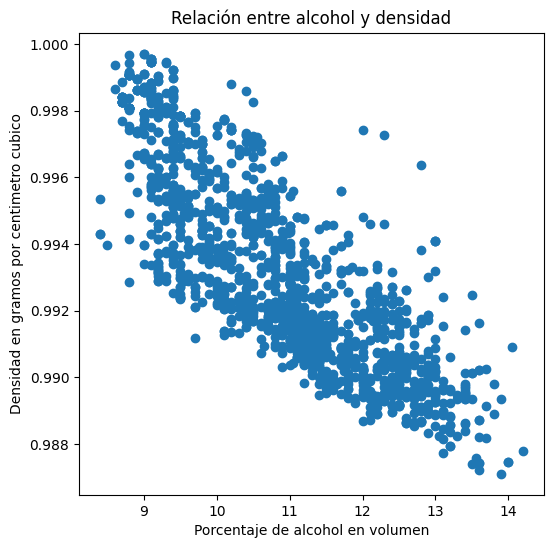

In [235]:
%matplotlib inline
import matplotlib.pyplot as plt
# Crear el gráfico de dispersión
plt.figure(figsize=(6, 6))  # Hacer el gráfico cuadrado
plt.scatter(moscatel_dataset["alcohol"], moscatel_dataset["density"])

# Agregar etiquetas a los ejes
plt.xlabel("Porcentaje de alcohol en volumen")
plt.ylabel("Densidad en gramos por centimetro cubico")

# Agregar un título al gráfico
plt.title("Relación entre alcohol y densidad")

# Mostrar el gráfico
plt.show()

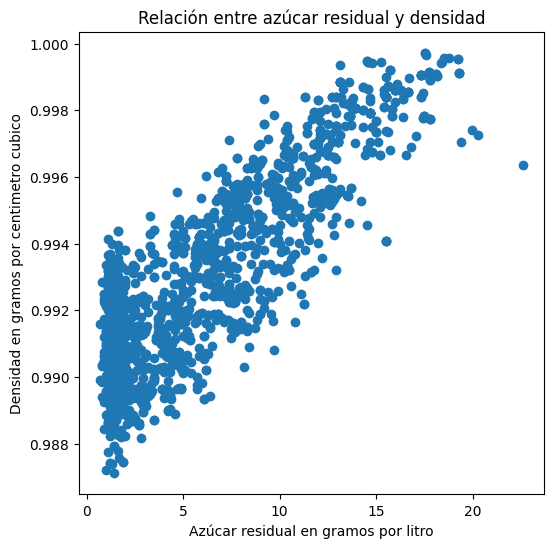

In [236]:
# Crear el gráfico de dispersión
plt.figure(figsize=(6, 6))  # Hacer el gráfico cuadrado
plt.scatter(moscatel_dataset["residual sugar"], moscatel_dataset["density"])

# Agregar etiquetas a los ejes
plt.xlabel("Azúcar residual en gramos por litro")
plt.ylabel("Densidad en gramos por centimetro cubico")

# Agregar un título al gráfico
plt.title("Relación entre azúcar residual y densidad")

# Mostrar el gráfico
plt.show()

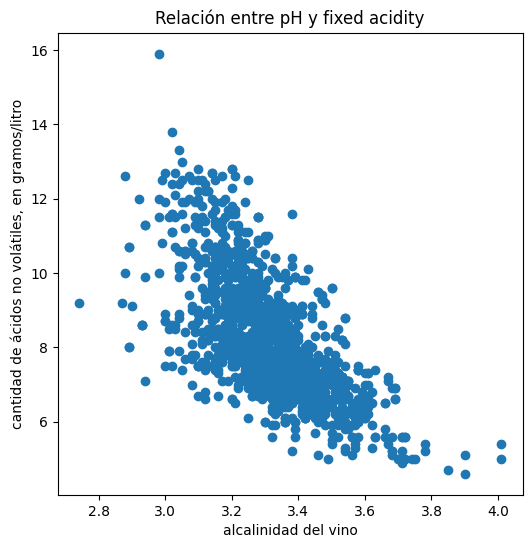

In [237]:
%matplotlib inline
import matplotlib.pyplot as plt
# Crear el gráfico de dispersión
plt.figure(figsize=(6, 6))  # Hacer el gráfico cuadrado
plt.scatter(syrah_dataset["pH"], syrah_dataset["fixed acidity"])

# Agregar etiquetas a los ejes
plt.xlabel("alcalinidad del vino")
plt.ylabel("cantidad de ácidos no volátiles, en gramos/litro")

# Agregar un título al gráfico
plt.title("Relación entre pH y fixed acidity")

# Mostrar el gráfico
plt.show()

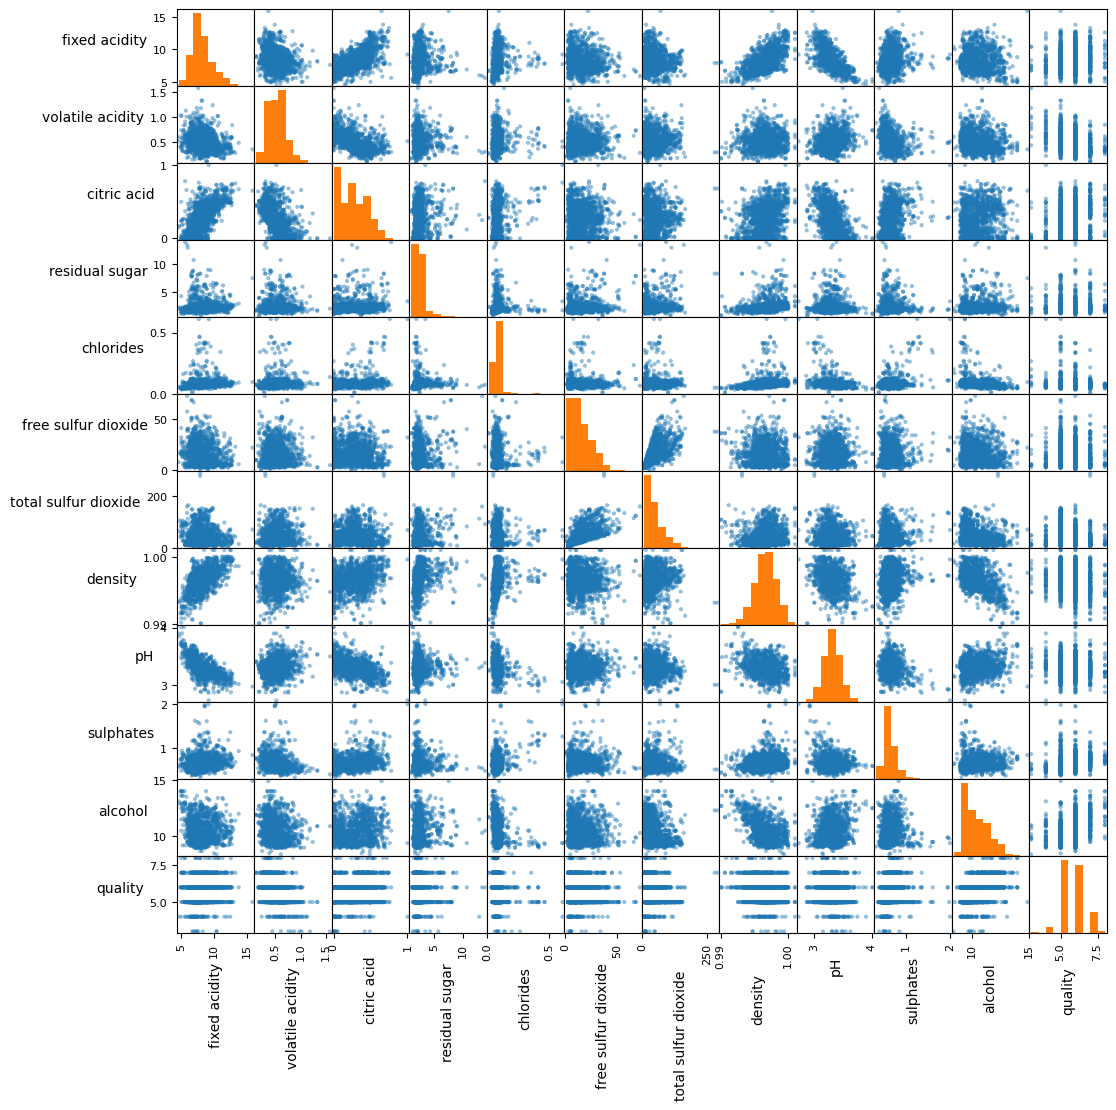

In [238]:
# Seleccionar las columnas numéricas
numeric_cols = syrah_dataset.select_dtypes(include=['number'])

# Crear el scatter matrix
axs = pd.plotting.scatter_matrix(numeric_cols, figsize=(12, 12), alpha=0.47, hist_kwds={'color':'#ff7f0e'})
# la mostramos por pantalla
# acomodamos la orientación del contenido de los ejes
for i in range(len(numeric_cols.columns)):
  for j in range(len(numeric_cols.columns)):
    ax=axs[i,j]
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
plt.show()

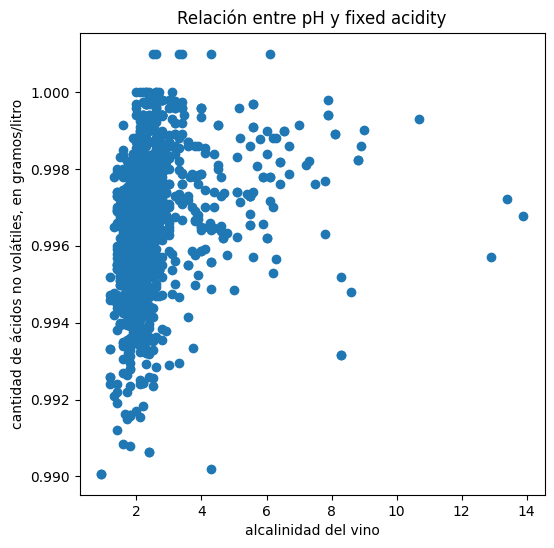

In [239]:
%matplotlib inline
import matplotlib.pyplot as plt
# Crear el gráfico de dispersión
plt.figure(figsize=(6, 6))  # Hacer el gráfico cuadrado
plt.scatter(syrah_dataset["residual sugar"], syrah_dataset["density"])

# Agregar etiquetas a los ejes
plt.xlabel("alcalinidad del vino")
plt.ylabel("cantidad de ácidos no volátiles, en gramos/litro")

# Agregar un título al gráfico
plt.title("Relación entre pH y fixed acidity")

# Mostrar el gráfico
plt.show()

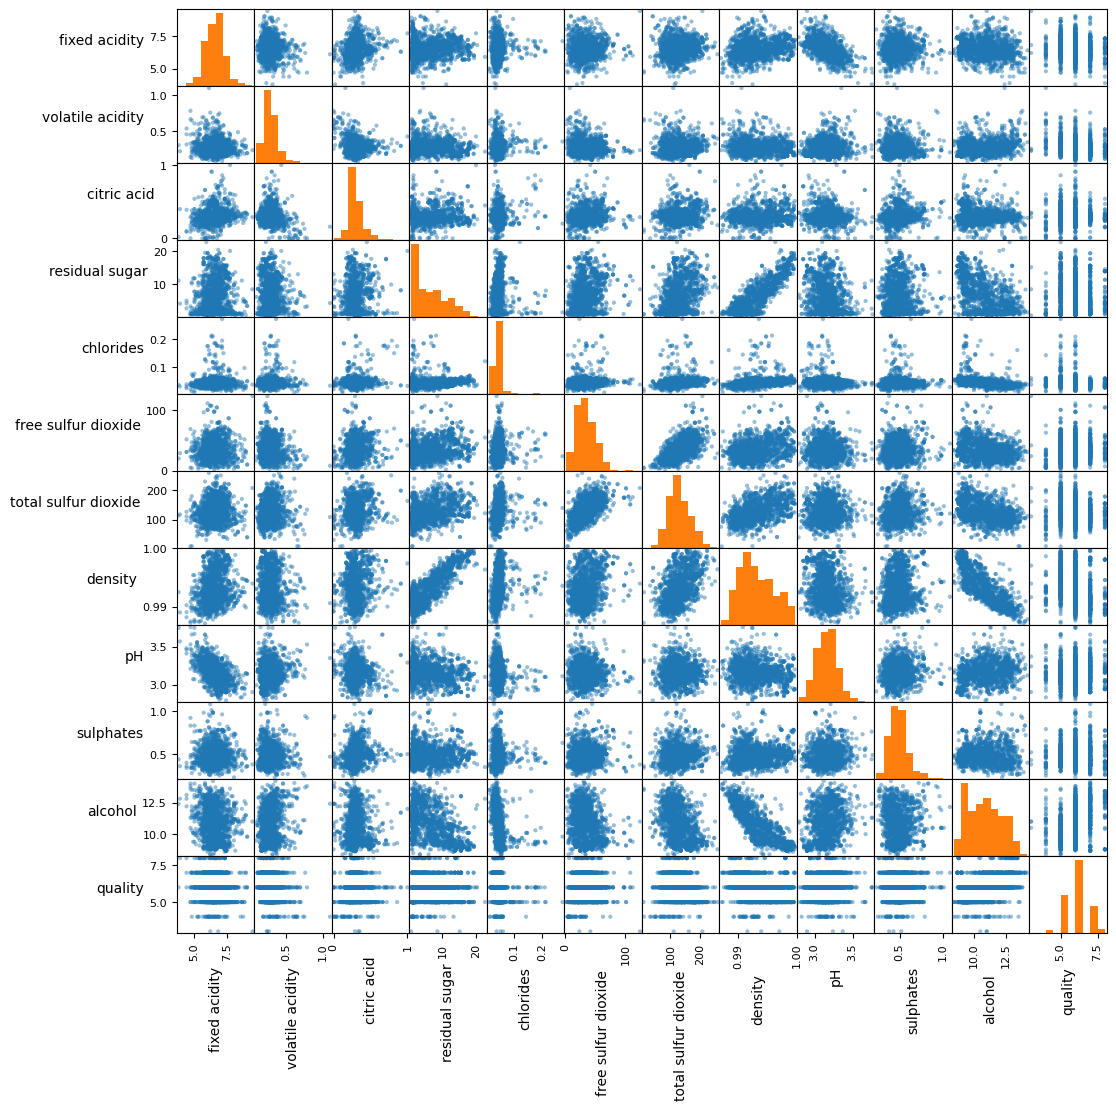

In [240]:
# Seleccionar las columnas numéricas
numeric_cols = moscatel_dataset.select_dtypes(include=['number'])

# Crear el scatter matrix
axs = pd.plotting.scatter_matrix(numeric_cols, figsize=(12, 12), alpha=0.47, hist_kwds={'color':'#ff7f0e'})
# la mostramos por pantalla
# acomodamos la orientación del contenido de los ejes
for i in range(len(numeric_cols.columns)):
  for j in range(len(numeric_cols.columns)):
    ax=axs[i,j]
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
plt.show()

### Analisis multivariado

In [241]:
#Para analizar PCA, descartamos las columnas con variables cualitativas.
pca_moscatel_dataset=moscatel_dataset.drop(columns="quality")

In [242]:
#Analizamos el desvio de cada variable
pca_moscatel_dataset.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1587.000000       1587.000000  1587.000000     1587.000000   
mean        6.531065          0.282335     0.304612        6.409924   
std         0.706696          0.099181     0.104944        4.842997   
min         3.800000          0.085000     0.000000        0.700000   
25%         6.100000          0.220000     0.250000        1.900000   
50%         6.500000          0.270000     0.290000        5.300000   
75%         6.900000          0.330000     0.340000        9.800000   
max         9.400000          1.100000     1.000000       22.600000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1587.000000          1587.000000           1587.000000  1587.000000   
mean      0.045269            34.940769            128.862319     0.993226   
std       0.020793            16.409145             37.122901     0.002897   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.035000            23.000000            102.500000     0.990910   
50%       0.043000            33.000000            124.000000     0.992750   
75%       0.050000            45.000000            153.500000     0.995400   
max       0.271000           124.000000            259.000000     0.999710   

                pH    sulphates      alcohol  
count  1587.000000  1587.000000  1587.000000  
mean      3.162098     0.490069    10.849439  
std       0.139806     0.112936     1.308437  
min       2.790000     0.230000     8.400000  
25%       3.070000     0.410000     9.700000  
50%       3.160000     0.480000    10.800000  
75%       3.250000     0.550000    11.900000  
max       3.760000     1.080000    14.200000

In [243]:
#Los desvíos son muy distintos (p.e. total sulfur dioxide y volatile acidity), por lo tanto las varianzas también. Tenemos que estandarizar.
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# estandarizamos X
scaler = StandardScaler()
moscatel_scaled = scaler.fit_transform(pca_moscatel_dataset)

print(np.std(moscatel_scaled, axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


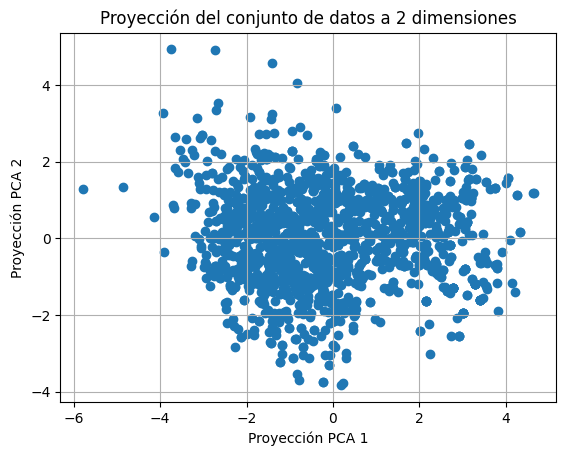

In [244]:
# Ahora aplicamos PCA a los datos estandarizados
pca = PCA(n_components=2)
moscatel_pca = pca.fit_transform(moscatel_scaled)
# graficamos los datos
plt.scatter(moscatel_pca[:,0], moscatel_pca[:,1])
plt.grid(True)
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.show()

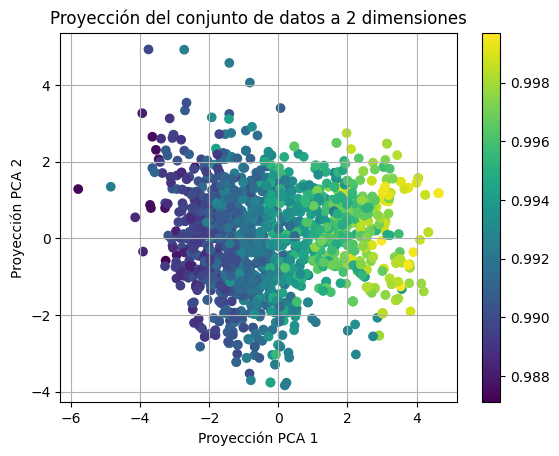

In [245]:
plt.scatter(moscatel_pca[:,0], moscatel_pca[:,1], c=moscatel_dataset["density"], cmap='viridis')
plt.grid(True)
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.colorbar()
plt.show()

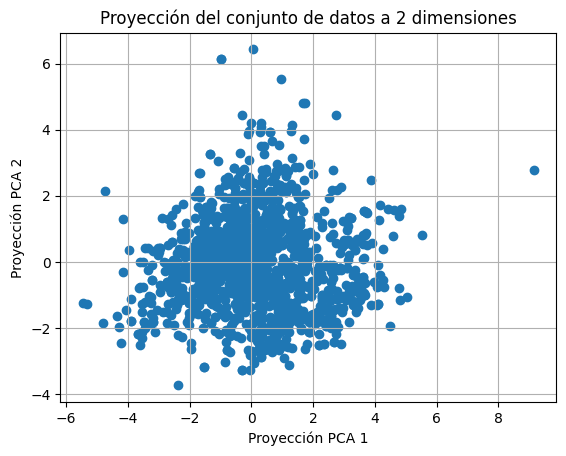

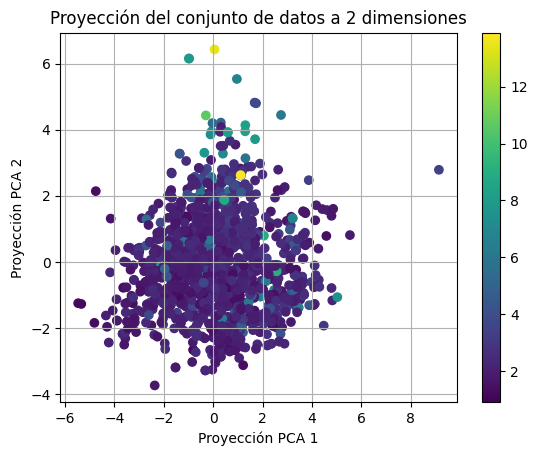

In [246]:

import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Para analizar PCA, descartamos las columnas con variables cualitativas.
pca_syrah_dataset=syrah_dataset.drop(columns="quality")

# estandarizamos X
scaler = StandardScaler()
syrah_scaled = scaler.fit_transform(pca_syrah_dataset)

# Ahora aplicamos PCA a los datos estandarizados
pca = PCA(n_components=2)
syrah_pca = pca.fit_transform(syrah_scaled)
# graficamos los datos
plt.scatter(syrah_pca[:,0], syrah_pca[:,1])
plt.grid(True)
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.show()

plt.scatter(syrah_pca[:,0], syrah_pca[:,1], c=syrah_dataset["residual sugar"], cmap='viridis')
plt.grid(True)
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.colorbar()
plt.show()

In [247]:
# importamos el t-SNE
from sklearn.manifold import TSNE

# creamos el objeto, lo fitteamos en nuestros datos y lo aplicamos sobre esos mismos
moscatel_tsne = TSNE(n_components=2, random_state=10).fit_transform(moscatel_scaled) 
# imprimimos los tamaños antes y después
print('Before t-SNE: {}'.format(moscatel_scaled.shape))
print('After t-SNE: {}'.format(moscatel_tsne.shape))

Before t-SNE: (1587, 11)
After t-SNE: (1587, 2)


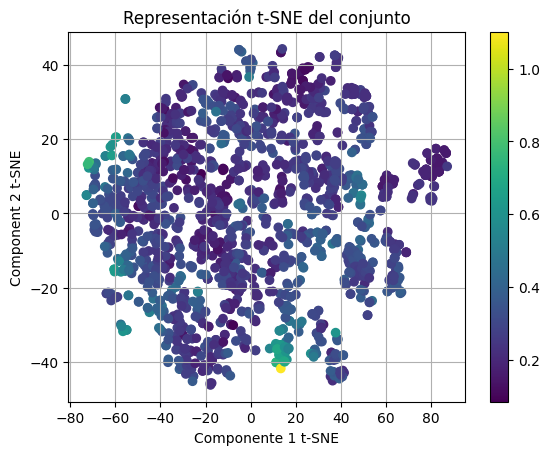

In [248]:
# graficamos los datos, el color de cada punto representa el valor de la casa
plt.scatter(moscatel_tsne[:,0], moscatel_tsne[:,1], c=moscatel_dataset["volatile acidity"], cmap='viridis')
plt.grid(True)
plt.xlabel('Componente 1 t-SNE')
plt.ylabel('Component 2 t-SNE')
plt.title('Representación t-SNE del conjunto')
plt.colorbar()
plt.show()

Before t-SNE: (3115, 12)
After t-SNE: (3115, 2)


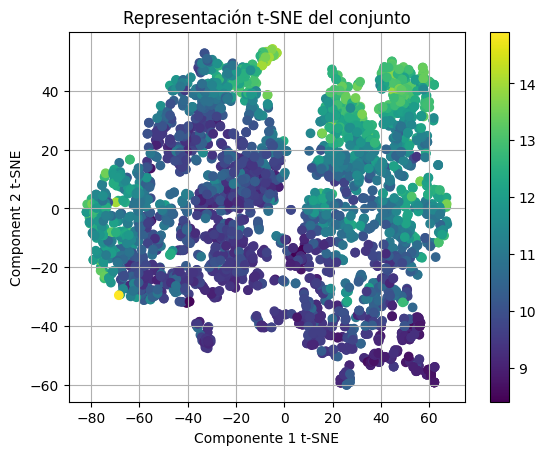

In [249]:
# importamos el t-SNE
from sklearn.manifold import TSNE

# creamos el objeto, lo fitteamos en nuestros datos y lo aplicamos sobre esos mismos
X_tsne = TSNE(n_components=2, random_state=10).fit_transform(preprocessed_dataset_scaled) 
# imprimimos los tamaños antes y después
print('Before t-SNE: {}'.format(preprocessed_dataset_scaled.shape))
print('After t-SNE: {}'.format(X_tsne.shape))

# graficamos los datos, el color de cada punto representa el valor de la casa
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=preprocessed_dataset["alcohol"], cmap='viridis')
plt.grid(True)
plt.xlabel('Componente 1 t-SNE')
plt.ylabel('Component 2 t-SNE')
plt.title('Representación t-SNE del conjunto')
plt.colorbar()
plt.show()

In [250]:
# importamos umap
import umap.umap_ as umap

# creamos el objeto, lo fitteamos en nuestros datos y lo aplicamos sobre esos mismos
moscatel_umap = umap.UMAP(n_components=2).fit_transform(moscatel_scaled)
# imprimimos los tamaños antes y después
print('Antes de UMAP: {}'.format(moscatel_scaled.shape))
print('Después de UMAP: {}'.format(moscatel_umap.shape))

Antes de UMAP: (1587, 11)
Después de UMAP: (1587, 2)


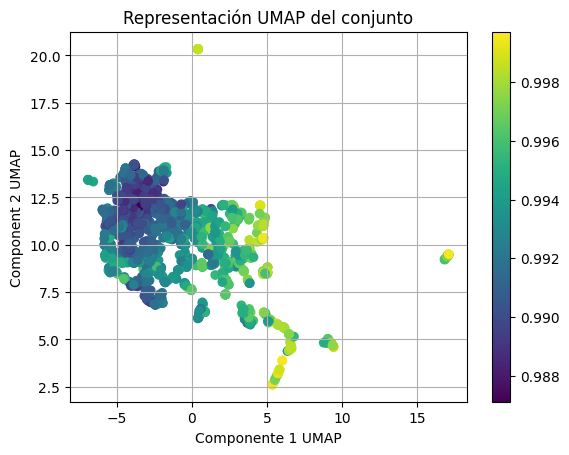

In [251]:
# graficamos los datos, el color de cada punto representa el valor de la casa
plt.scatter(moscatel_umap[:,0], moscatel_umap[:,1], c=moscatel_dataset["density"], cmap='viridis')
plt.grid(True)
plt.xlabel('Componente 1 UMAP')
plt.ylabel('Component 2 UMAP')
plt.title('Representación UMAP del conjunto')
plt.colorbar()
plt.show()

### Clustering

In [252]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

moscatel_dataset_n=moscatel_dataset.copy()

# Seleccionamos las columnas numéricas para la normalización
numeric_cols = moscatel_dataset_n.select_dtypes(include=np.number).columns

# Creamos un objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajustamos el scaler a los datos y transformamos los datos
moscatel_dataset_n[numeric_cols] = scaler.fit_transform(moscatel_dataset_n[numeric_cols])

# Imprimimos el DataFrame con los datos normalizados
moscatel_dataset_n.head()


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.767857          0.152709         0.32        0.447489   0.080153   
1       0.357143          0.142857         0.20        0.059361   0.129771   
2       0.660714          0.241379         0.36        0.086758   0.160305   
3       0.500000          0.290640         0.36        0.388128   0.198473   
4       0.464286          0.064039         0.29        0.050228   0.133588   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.262295                 0.384  0.552381  0.329897   0.223529   
1             0.303279                 0.580  0.408730  0.432990   0.188235   
2             0.196721                 0.468  0.306349  0.546392   0.352941   
3             0.327869                 0.820  0.832540  0.536082   0.388235   
4             0.155738                 0.424  0.361111  0.319588   0.176471   

    alcohol  quality  
0  0.586207      0.6  
1  0.310345      0.6  
2  0.741379      0.6  
3  0.172414      0.4  
4  0.310345      0.4

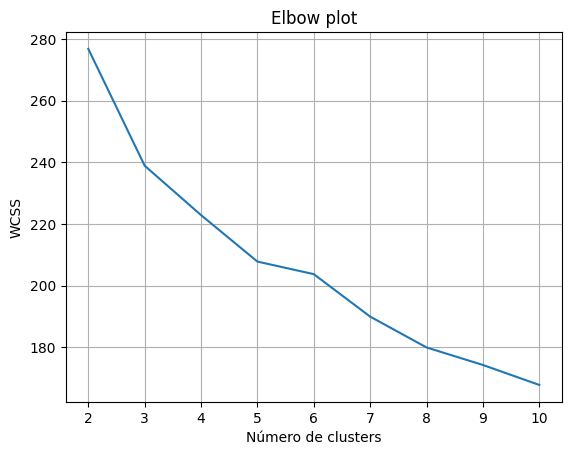

In [253]:
from sklearn.cluster import KMeans

muestras_mds = moscatel_dataset_n.drop(columns=['quality'])
# calculamos cada KMean para cada número de clusters, y nos quedamos con el valor
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(muestras_mds)
    wcss.append(kmeans.inertia_)

# graficamos el elbow plot
plt.plot(range(2, 11), wcss)
plt.title('Elbow plot')
plt.grid("True")
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

In [254]:
from sklearn.cluster import KMeans

# separamos las features de los nombres de los países
calidades = moscatel_dataset_n['quality']
muestras_mds = moscatel_dataset_n.drop(columns=['quality'])

# inicializamos un objeto de la clase KMeans con el modelo
kmeans = KMeans(n_clusters=8, verbose=0, random_state=100)
# lo aplicamos sobre nuestros datos para hallar los centroides
kmeans.fit(muestras_mds)
# y obtenemos los clusters a los que fueron asignadas las muestras
clusters_kmeans = kmeans.predict(muestras_mds)
print(clusters_kmeans)

[7 4 5 ... 3 5 0]


In [255]:
import pandas as pd

# Creamos un DataFrame con los países y los clusters asignados
cluster_df = pd.DataFrame({'quality': calidades, 'Cluster': clusters_kmeans})

# Imprimimos los países de cada cluster
for cluster_num in range(8):
  print(f"\nCluster {cluster_num}:")
  print(cluster_df[cluster_df['Cluster'] == cluster_num]['quality'].tolist())


Cluster 0:
[0.6000000000000001, 0.3999999999999999, 1.0, 0.8, 0.3999999999999999, 1.0, 0.8, 0.8, 0.8, 0.6000000000000001, 0.8, 0.6000000000000001, 0.6000000000000001, 0.8, 0.6000000000000001, 0.6000000000000001, 0.8, 0.6000000000000001, 0.6000000000000001, 0.3999999999999999, 0.6000000000000001, 0.6000000000000001, 0.8, 0.8, 0.8, 0.6000000000000001, 1.0, 1.0, 0.8, 0.8, 1.0, 0.6000000000000001, 0.6000000000000001, 0.8, 0.8, 0.8, 0.8, 0.8, 0.6000000000000001, 0.6000000000000001, 0.6000000000000001, 0.6000000000000001, 0.6000000000000001, 0.19999999999999996, 0.6000000000000001, 0.6000000000000001, 0.6000000000000001, 0.6000000000000001, 0.6000000000000001, 0.6000000000000001, 0.19999999999999996, 0.8, 0.8, 0.8, 0.8, 0.8, 0.6000000000000001, 0.6000000000000001, 0.3999999999999999, 0.6000000000000001, 0.8, 0.3999999999999999, 0.8, 0.8, 0.8, 0.8, 1.0, 0.6000000000000001, 0.6000000000000001, 0.3999999999999999, 0.8, 0.3999999999999999, 0.6000000000000001, 0.6000000000000001, 0.6000000000000

In [256]:
for idx, val in calidades.value_counts().sort_index().items():
    print(idx,val)

0.0 3
0.19999999999999996 39
0.3999999999999999 410
0.6000000000000001 792
0.8 293
1.0 50


c:\Users\usuario\Documents\Facultad\CsDatos\TPE - Hermida_Russo_Velis\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


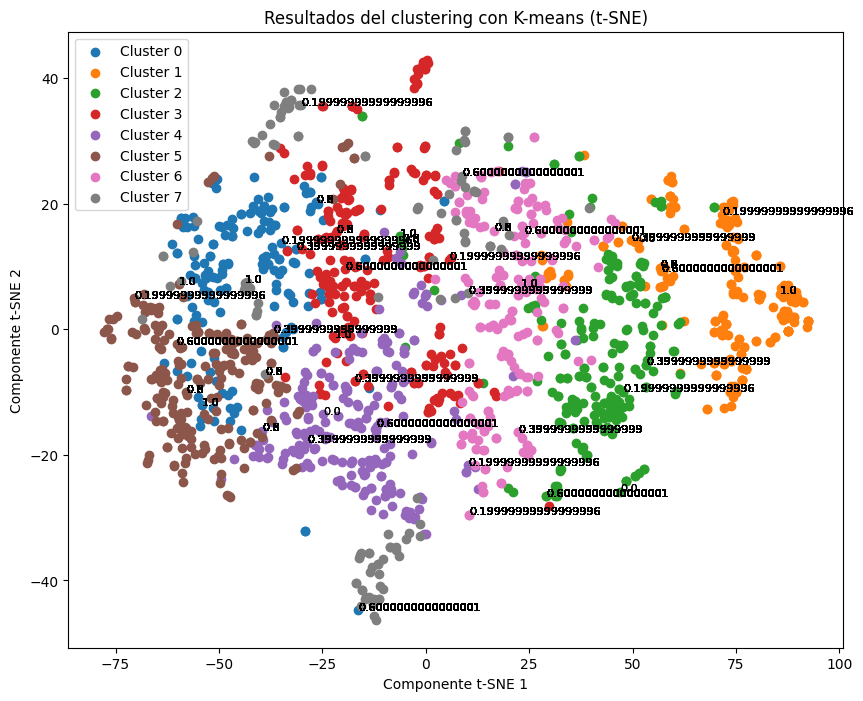

In [257]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Reducir la dimensionalidad de los datos usando t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(muestras_mds)

# Crear un DataFrame con los resultados de t-SNE y los clusters
tsne_df = pd.DataFrame({'x': tsne_results[:, 0], 'y': tsne_results[:, 1], 'Cluster': clusters_kmeans, 'quality': calidades})

# Graficar los resultados de t-SNE, coloreando los puntos según el cluster
plt.figure(figsize=(10, 8))
for cluster_num in range(8):
  plt.scatter(tsne_df[tsne_df['Cluster'] == cluster_num]['x'], tsne_df[tsne_df['Cluster'] == cluster_num]['y'], label=f'Cluster {cluster_num}')
  for c in calidades:
    row = tsne_df[(tsne_df['Cluster'] == cluster_num) & (tsne_df['quality'] == c)]
    if not row.empty:
      plt.text(row['x'].values[0], row['y'].values[0], c, fontsize=8)

plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.title('Resultados del clustering con K-means (t-SNE)')
plt.legend()
plt.show()


Realizamos K-Means para hacer clustering. La única variable que podíamos utilizar para 

In [258]:
t_moscatel_dataset=moscatel_dataset.drop_duplicates(["density"])

In [259]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

moscatel_dataset_tn=t_moscatel_dataset.copy()

# Seleccionamos las columnas numéricas para la normalización
numeric_cols = moscatel_dataset_tn.select_dtypes(include=np.number).columns

# Creamos un objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajustamos el scaler a los datos y transformamos los datos
moscatel_dataset_tn[numeric_cols] = scaler.fit_transform(moscatel_dataset_tn[numeric_cols])

# Imprimimos el DataFrame con los datos normalizados
moscatel_dataset_tn.head()


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0           0.74          0.233083     0.372093        0.444954   0.105528   
1           0.28          0.218045     0.232558        0.055046   0.170854   
2           0.62          0.368421     0.418605        0.082569   0.211055   
3           0.44          0.443609     0.418605        0.385321   0.261307   
4           0.40          0.097744     0.337209        0.045872   0.175879   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.262295              0.396694  0.552381  0.345238   0.253333   
1             0.303279              0.599174  0.408730  0.464286   0.213333   
2             0.196721              0.483471  0.306349  0.595238   0.400000   
3             0.327869              0.847107  0.832540  0.583333   0.440000   
4             0.155738              0.438017  0.361111  0.333333   0.200000   

    alcohol  quality  
0  0.586207      0.6  
1  0.310345      0.6  
2  0.741379      0.6  
3  0.172414      0.4  
4  0.310345      0.4

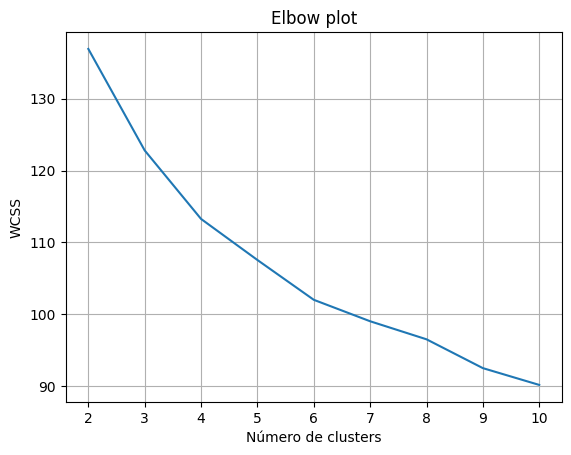

In [260]:
from sklearn.cluster import KMeans

muestras_mds = moscatel_dataset_tn.drop(columns=['density'])
# calculamos cada KMean para cada número de clusters, y nos quedamos con el valor
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(muestras_mds)
    wcss.append(kmeans.inertia_)

# graficamos el elbow plot
plt.plot(range(2, 11), wcss)
plt.title('Elbow plot')
plt.grid("True")
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

In [261]:
from sklearn.cluster import KMeans

# separamos las features de los nombres de los países
densidades = moscatel_dataset_tn['density']
muestras_mds = moscatel_dataset_tn.drop(columns=['density'])

# inicializamos un objeto de la clase KMeans con el modelo
kmeans = KMeans(n_clusters=4, verbose=0, random_state=100)
# lo aplicamos sobre nuestros datos para hallar los centroides
kmeans.fit(muestras_mds)
# y obtenemos los clusters a los que fueron asignadas las muestras
clusters_kmeans = kmeans.predict(muestras_mds)
print(clusters_kmeans)

[3 2 0 1 2 0 3 0 2 0 0 3 0 2 2 3 3 3 1 3 0 1 3 2 1 0 3 3 0 0 0 1 1 0 0 0 0
 1 0 0 2 0 2 1 0 0 3 3 0 2 0 2 1 1 0 2 3 1 3 3 0 2 1 1 1 2 2 3 0 3 3 0 1 0
 3 0 3 3 0 2 3 2 0 2 2 3 0 1 0 3 2 2 3 3 0 3 0 3 3 1 1 1 2 2 2 3 3 3 0 2 1
 3 2 1 1 0 1 3 0 0 1 1 2 1 3 0 3 0 3 1 3 0 0 1 2 3 2 0 3 2 0 0 1 1 0 0 1 1
 0 2 2 1 2 0 0 3 3 3 3 0 2 0 2 0 1 0 0 2 1 1 0 3 3 0 0 0 3 0 1 0 3 3 0 1 1
 3 1 3 2 3 3 3 2 1 3 2 0 3 3 3 3 3 3 2 3 3 3 0 0 3 0 0 2 3 0 3 1 0 1 1 0 1
 1 1 1 1 2 0 2 1 3 3 0 2 2 0 3 1 2 2 1 2 0 0 2 0 1 3 0 1 0 0 0 3 0 2 3 2 1
 1 3 0 1 2 0 1 1 3 2 3 1 0 2 2 0 2 1 0 1 1 2 2 2 2 0 3 1 3 0 0 0 3 1 1 1 1
 1 1 1 1 3 3 1 1 1 0 1 0 3 1 2 3 3 1 3 1 0 0 0 0 2 0 1 1 1 0 0 3 1 1 1 3 1
 1 3 2 3 2 1 3 0 0 0 3 0 3 1 3 3 2 1 3 0 0 3 3 1 2 2 1 2 0 2 1 3 1 1 1 0 3
 2 1 2 2 1 2 3 0 2 0 0 1 2 1 2 2 2 1 2 2 2 1 1 3 1 3 0 0 3 2 1 1 1 2 1 3 2
 2 2 2 1 0 2 1 3 2 1 2 3 3 1 0 1 1 1 0 2 2 1 0 1 2 1 2 2 1 1 0 1 1 1 0 0 3
 2 2 1 0 1 3 1 0 3 0 0 2 3 3 0 3 3 0 1 1 2 1 0 0 1 2 1 2 1 2 2 3 1 1 0 0 2
 1 2 2 3 3 0 0 1 1 1 1 1 

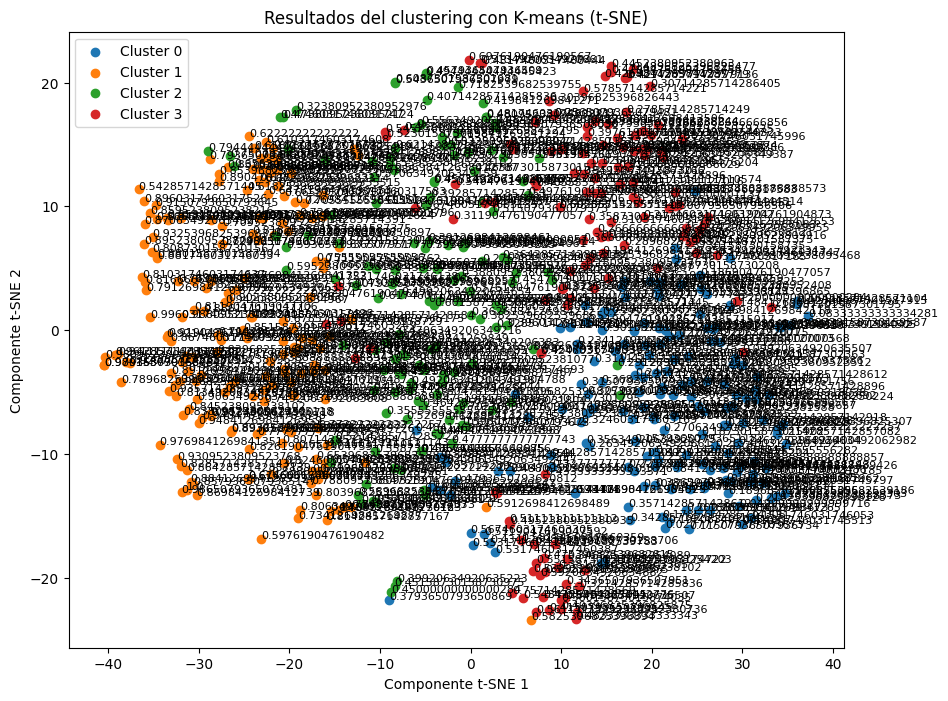

In [262]:
import pandas as pd

# Creamos un DataFrame con los países y los clusters asignados
cluster_df = pd.DataFrame({'density': densidades, 'Cluster': clusters_kmeans})

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Reducir la dimensionalidad de los datos usando t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(muestras_mds)

# Crear un DataFrame con los resultados de t-SNE y los clusters
tsne_df = pd.DataFrame({'x': tsne_results[:, 0], 'y': tsne_results[:, 1], 'Cluster': clusters_kmeans, 'density': densidades})


# Graficar los resultados de t-SNE, coloreando los puntos según el cluster
plt.figure(figsize=(10, 8))
for cluster_num in range(4):
  plt.scatter(tsne_df[tsne_df['Cluster'] == cluster_num]['x'], tsne_df[tsne_df['Cluster'] == cluster_num]['y'], label=f'Cluster {cluster_num}')
  for c in densidades:
    row = tsne_df[(tsne_df['Cluster'] == cluster_num) & (tsne_df['density'] == c)]
    if not row.empty:
      plt.text(row['x'].values[0], row['y'].values[0], c, fontsize=8)

plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.title('Resultados del clustering con K-means (t-SNE)')
plt.legend()
plt.show()

## Validando hipótesis

### Los consumidores prefieren vinos más dulces.

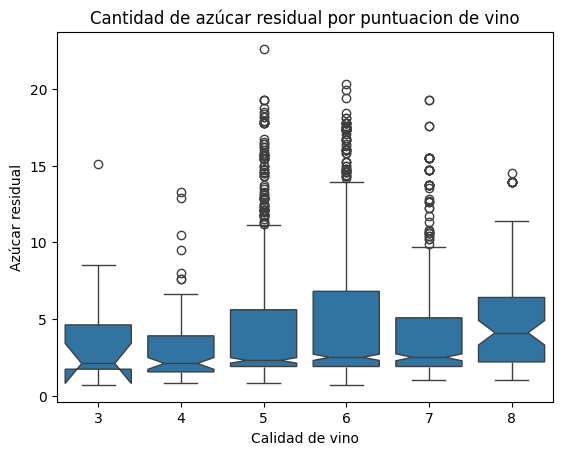

In [263]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='quality', y='residual sugar', data=preprocessed_dataset, notch=True)
plt.title("Cantidad de azúcar residual por puntuacion de vino")
plt.xlabel("Calidad de vino")
#plt.xticks(ticks=[0, 1], labels=["En vías de desarrollo", "Desarrollado"])
plt.ylabel("Azúcar residual")
plt.show()

In [264]:
cant=preprocessed_dataset[preprocessed_dataset["quality"]==3].shape[0] 

print(cant)

12


Como vemos, tenemos el problema del vestido para el boxplot de "3". Esto se debe al outlier y la poca cantidad de muestras con ese valor de calidad. Para solucionar esto, vamos a reagrupar las muestras en tres: "Baja calidad" (0), "Media calidad" (1) y "Alta calidad" (2).

In [265]:
dataset_aux=preprocessed_dataset.copy()
dataset_aux["quality"]=dataset_aux["quality"].map({3 : 0 , 4 : 0 , 5 : 1 , 6 : 1 , 7 : 2 , 8 : 2})

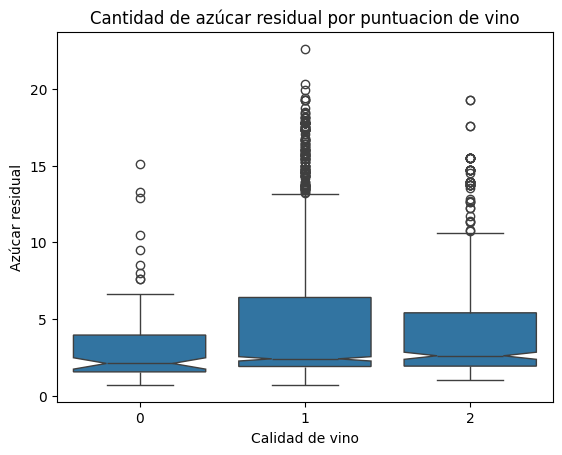

In [266]:
sns.boxplot(x='quality', y='residual sugar', data=dataset_aux, notch=True)
plt.title("Cantidad de azúcar residual por puntuacion de vino")
plt.xlabel("Calidad de vino")
#plt.xticks(ticks=[0, 1], labels=["En vías de desarrollo", "Desarrollado"])
plt.ylabel("Azúcar residual")
plt.show()

Podemos ver que hay superposicion de acogotamientos, lo cual es un mal indicio para que nuestra hipotesis resulte verdadera. Ya que nos puede estar diciendo que no hay diferencias significativas entre los grupos.

Como no son grupos apareados, vamos a utilizar el test t. Para utilizar este test primero debemos validar normalidad de los datos.

In [267]:
from scipy.stats import shapiro

# Separamos los datos en tres grupos
baja_calidad = dataset_aux[dataset_aux['quality'] == 0]['residual sugar']
media_calidad = dataset_aux[dataset_aux['quality'] == 1]['residual sugar']
alta_calidad = dataset_aux[dataset_aux['quality'] == 2]['residual sugar']

# Test de Shapiro-Wilk para vinos de baja calidad
stat, p = shapiro(baja_calidad)
print(f"Test de Shapiro-Wilk para vinos de baja calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos de media calidad
stat, p = shapiro(media_calidad)
print(f"Test de Shapiro-Wilk para vinos de media calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos de alta calidad
stat, p = shapiro(alta_calidad)
print(f"Test de Shapiro-Wilk para vinos de alta calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para vinos de baja calidad: Estadístico=0.745, p-valor=0.000
Test de Shapiro-Wilk para vinos de media calidad: Estadístico=0.752, p-valor=0.000
Test de Shapiro-Wilk para vinos de alta calidad: Estadístico=0.761, p-valor=0.000


In [268]:
from scipy.stats import kstest

# Test de Kolmogorov-Smirnov para vinos de baja calidad
stat, p = kstest(baja_calidad, 'norm')
print(f"Test de Kolmogorov-Smirnov para vinos de baja calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Kolmogorov-Smirnov para vinos de media calidad
stat, p = kstest(media_calidad, 'norm')
print(f"Test de Kolmogorov-Smirnov para vinos de media calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = kstest(alta_calidad, 'norm')
print(f"Test de Kolmogorov-Smirnov para vinos de alta calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Kolmogorov-Smirnov para vinos de baja calidad: Estadístico=0.806, p-valor=0.000
Test de Kolmogorov-Smirnov para vinos de media calidad: Estadístico=0.854, p-valor=0.000
Test de Kolmogorov-Smirnov para vinos de alta calidad: Estadístico=0.853, p-valor=0.000


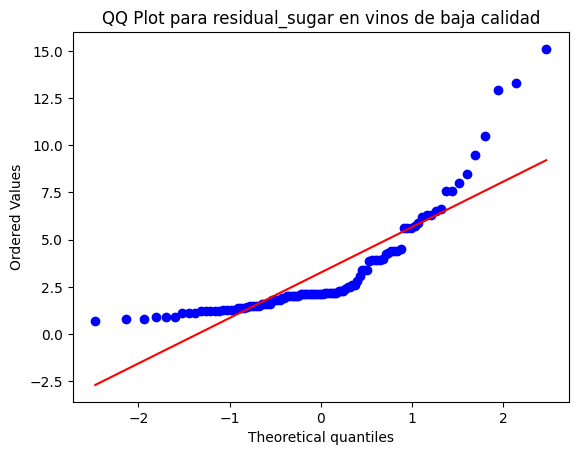

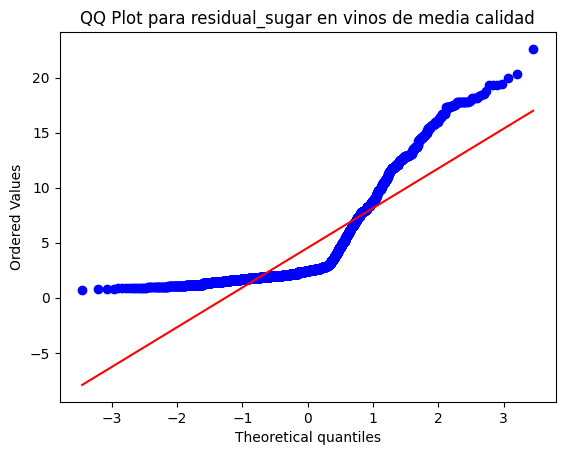

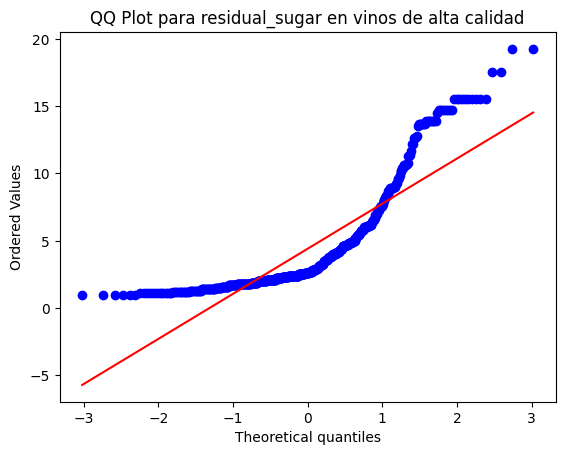

In [269]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# QQ plot para vinos de baja calidad
stats.probplot(baja_calidad, dist="norm", plot=plt)
plt.title("QQ Plot para residual_sugar en vinos de baja calidad")
plt.show()

# QQ plot para vinos de media calidad
stats.probplot(media_calidad, dist="norm", plot=plt)
plt.title("QQ Plot para residual_sugar en vinos de media calidad")
plt.show()

# QQ plot  para vinos de alta calidad
stats.probplot(alta_calidad, dist="norm", plot=plt)
plt.title("QQ Plot para residual_sugar en vinos de alta calidad")
plt.show()

Ni los dos test ni el QQ plot nos están mostrando normalidad en los datos así que no podemos utilizar el test t. Validamos la homocedasticidad con Levene.

In [270]:
#Test de levene para nuestro analisis.
stat, p = stats.levene(baja_calidad, media_calidad, alta_calidad)
print(f"Test de Levene para residual_sugar: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para residual_sugar: Estadístico=4.225, p-valor=0.015


Los datos no son homocedasticos. Dado que nuestro conjunto no cumple con ninguno de los supuestos que se necesitan para realizar la comparación de estos grupos, vamos a recurrir al test Kruskal-Wallis.

In [210]:
# Test de Kruskal-Wallis para comparar azucar residual entre vinos de distinta calidad
stat, p = stats.kruskal(baja_calidad, media_calidad, alta_calidad)
print(f"Test de Kruskal-Wallis para residual_sugar: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("Existe una diferencia significativa en el residual_sugar entre vinos de diferente calidad.")
else:
    print("Se rechaza la hipótesis nula.")
    print("No hay una diferencia significativa en el residual_sugar entre vinos de diferente calidad.")

Test de Kruskal-Wallis para residual_sugar: Estadístico=12.322, p-valor=0.002
Se rechaza la hipótesis nula.
No hay una diferencia significativa en el residual_sugar entre vinos de diferente calidad.


Según el resultado del test, podemos concluir que las preferencias de los consumidores por los vinos no se basan en la dulzura de los mismos.

### Para mayores niveles de ebriedad, vinos Syrah debe tomar.

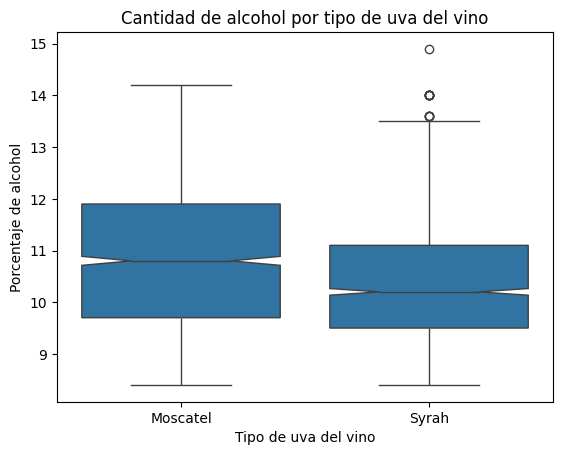

In [271]:
sns.boxplot(x='type', y='alcohol', data=preprocessed_dataset, notch=True)
plt.title("Cantidad de alcohol por tipo de uva del vino")
plt.xlabel("Tipo de uva del vino")
#plt.xticks(ticks=[0, 1], labels=["En vías de desarrollo", "Desarrollado"])
plt.ylabel("Porcentaje de alcohol")
plt.show()

Vemos por los acogotamientos de ese boxplot que puede haber diferencias significativas estadísticamente. Para realizar un test t, debemos validar normalidad. Utilizaremos Sharpiro-Wills.

In [272]:
from scipy.stats import shapiro

# Separamos los datos en dos
syrah_alcohol = preprocessed_dataset[preprocessed_dataset['type'] == "Syrah"]['alcohol']
moscatel_alcohol = preprocessed_dataset[preprocessed_dataset['type'] == "Moscatel"]['alcohol']

# Test de Shapiro-Wilk para vinos Syrah
stat, p = shapiro(syrah_alcohol)
print(f"Test de Shapiro-Wilk para vinos Syrah: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos Moscatel
stat, p = shapiro(moscatel_alcohol)
print(f"Test de Shapiro-Wilk para vinos Moscatel: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para vinos Syrah: Estadístico=0.928, p-valor=0.000
Test de Shapiro-Wilk para vinos Moscatel: Estadístico=0.967, p-valor=0.000


Validamos homocedasticidad con Levene.

In [274]:
stat, p = stats.levene(syrah_alcohol, moscatel_alcohol)
print(f"Test de Levene para alcohol: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para alcohol: Estadístico=101.325, p-valor=0.000


Los datos no son homocedasticos. Dado que nuestro conjunto no cumple con ninguno de los supuestos que se necesitan para realizar la comparación de estos grupos, vamos a recurrir al test Kruskal-Wallis.

In [275]:
# Test de Kruskal-Wallis para comparar alcohol entre vinos de diferente uva.
stat, p = stats.kruskal(syrah_alcohol, moscatel_alcohol)
print(f"Test de Kruskal-Wallis para alcohol: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("Existe una diferencia significativa en el porcenteaje de alcohol entre vinos Syrah y Moscatel.")
else:
    print("Se rechaza la hipótesis nula.")
    print("No hay una diferencia significativa en el porcenteaje de alcohol entre vinos Syrah y Moscatel.")

Test de Kruskal-Wallis para alcohol: Estadístico=73.351, p-valor=0.000
Se rechaza la hipótesis nula.
No hay una diferencia significativa en el porcenteaje de alcohol entre vinos Syrah y Moscatel.


### ??

In [151]:
for idx, val in moscatel_dataset["alcohol"].value_counts().sort_index().items():
    print(idx,val)

8.4 3
8.5 1
8.6 2
8.7 15
8.8 31
8.9 16
9.0 37
9.1 48
9.2 57
9.3 26
9.4 67
9.5 61
9.55 2
9.6 30
9.7 21
9.75 1
9.8 39
9.9 27
10.0 31
10.1 34
10.15 3
10.2 35
10.3 20
10.4 46
10.5 39
10.55 2
10.6 28
10.65 1
10.7 37
10.8 44
10.9 31
10.98 1
11.0 61
11.05 2
11.1 43
11.2 54
11.3 42
11.35 1
11.4 40
11.45 4
11.5 35
11.55 1
11.6 16
11.65 1
11.7 22
11.75 2
11.8 27
11.85 1
11.9 13
11.94 2
11.95 1
12.0 31
12.05 1
12.1 20
12.15 2
12.2 33
12.25 1
12.3 24
12.4 34
12.5 41
12.6 24
12.7 25
12.75 3
12.8 25
12.9 21
13.0 25
13.05 1
13.1 16
13.2 12
13.3 3
13.4 15
13.5 5
13.55 1
13.6 9
13.7 3
13.8 2
13.9 2
14.0 2
14.05 1
14.2 1


En el caso de citric acid, vemos que no hay una distribucion normal, aun así la comparacion entre la mediana y la media nos estaría indicando lo contrario ya que son prácticamente iguales. Como la media es sensible a valores extremos, y considerando a 1 como valor extremo, y hay gran cantidad de ceros esto provoca que tome un valor más cercano a cero.

Chlorides tiene la cola pesada, la Kurtosis da 41. Esto se da por la presencia de un valor extremo. Vemos que está sesgada a derecha.

Hipotesis: Hay un vino, el que tiene valores altos de azufre, que también tiene valores altos en el resto de columnas. Provocando que casi todas las graficas esten sesgadas a derecha. 

Segun una fuente, los valores normales de densidad en el vino pueden ir desde 0.990 g/cm³ (para vinos secos) hasta alrededor de 1.020 g/cm³ (para vinos dulces), con el mosto antes de la fermentación alcanzando valores más altos debido a su contenido de azúcar.
Vemos que hay 75 filas que superan ampliamente el valor máximo (llegando a valores de +100). Al representar tan solo un 2% de las muestras totales, decidimos descartarlas.

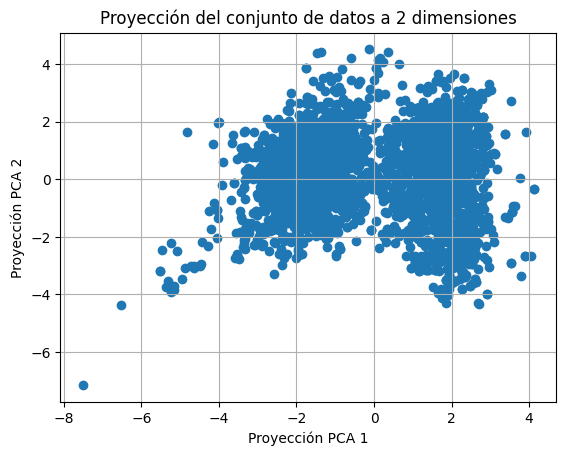

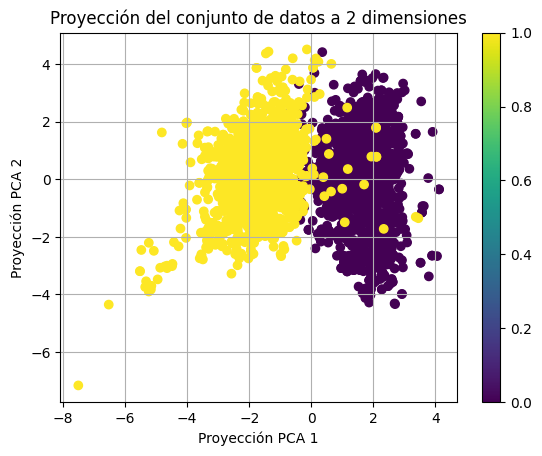

In [152]:
#Los desvíos son muy distintos (p.e. total sulfur dioxide y volatile acidity), por lo tanto las varianzas también. Tenemos que estandarizar.
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# Convertir la columna "type" a valores numéricos
le = LabelEncoder()
type_encoded = le.fit_transform(preprocessed_dataset["type"])
pca_dataset=preprocessed_dataset.drop(columns="type")

# estandarizamos X
scaler = StandardScaler()
preprocessed_dataset_scaled = scaler.fit_transform(pca_dataset)

#print(np.std(prep, axis=0))

# Ahora aplicamos PCA a los datos estandarizados
pca = PCA(n_components=2)
x_pca = pca.fit_transform(preprocessed_dataset_scaled)
# graficamos los datos
plt.scatter(x_pca[:,0], x_pca[:,1])
plt.grid(True)
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.show()

plt.scatter(x_pca[:,0], x_pca[:,1], c=type_encoded, cmap='viridis')
plt.grid(True)
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.colorbar()
plt.show()